<a href="https://colab.research.google.com/github/wlsisl/-/blob/main/1121_Pytorch_multinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2129015 통계학과 백지연

# 1. Multinomial regression with Python


## Exercise 2.3.4 Revisiting Iris data (HW)

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [6]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from tqdm import tqdm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)

#linear regression 하려면 정규화 해야 잘 되기때문에
# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-41-33c8e6db8fad>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-41-33c8e6db8fad>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


* X: 설명변수
* y: 클래스 값
* t: y의 원핫인코딩

Use multinomial logistic regression model to classiy the iris, and calculate the test error.

In [7]:
X[:1]

tensor([[-0.8977,  1.0156, -1.3358, -1.3111]])

In [8]:
y[:1]

tensor([0])

현재 train_loader에는 원핫인코딩 된 값에다가 x값을 받음

In [42]:
for xx, tt in train_loader:
    print(xx, tt)

tensor([[-0.7769,  2.3922, -1.2791, -1.4422],
        [-1.0184,  1.0156, -1.3924, -1.1799],
        [-0.7769,  1.0156, -1.2791, -1.3111],
        [ 2.1214, -0.1315,  1.6099,  1.1816],
        [ 0.3100, -0.1315,  0.4770,  0.2633],
        [-0.6561,  1.4745, -1.2791, -1.3111],
        [-0.1731, -1.2787,  0.7036,  1.0504],
        [ 1.0345,  0.5567,  1.1001,  1.1816],
        [-0.5354, -0.1315,  0.4203,  0.3945],
        [-0.8977,  1.7039, -1.0525, -1.0487],
        [ 0.1892, -1.9670,  0.1371, -0.2615],
        [ 0.1892, -0.1315,  0.5903,  0.7880],
        [ 0.6722, -0.8198,  0.8735,  0.9192],
        [ 0.3100, -0.3610,  0.5336,  0.2633],
        [-0.7769, -0.8198,  0.0804,  0.2633],
        [ 1.0345, -0.1315,  0.7036,  0.6568]]) tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],

In [43]:
#예측값 확률 잘 들어갔는지 확인해보기
z_model = nn.Linear(4,3,bias = True)
zhat = z_model(xx)
qhat = torch.softmax(zhat, dim = 1)
qhat

tensor([[0.2407, 0.4206, 0.3387],
        [0.1623, 0.1270, 0.7107],
        [0.2789, 0.1677, 0.5534],
        [0.4989, 0.2037, 0.2974],
        [0.1562, 0.4880, 0.3557],
        [0.2734, 0.4166, 0.3101],
        [0.2968, 0.1647, 0.5385],
        [0.4000, 0.1521, 0.4478]], grad_fn=<SoftmaxBackward0>)

클래스별 예측 확률을 softmax함수를 이용해 잘 나타내었다.
qhat은 설정한 3개의 클래스별로 속할 확률을 나타낸다.

100%|██████████| 100/100 [00:00<00:00, 174.33it/s]


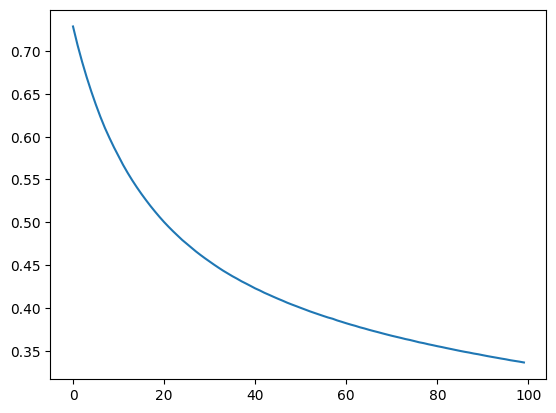

In [44]:
# modeling

# Loss ftn
def loss_ftn(qhat, tt):
    loss = -torch.mean(torch.sum(tt * torch.log(qhat), axis = 1))
    return loss

# linear model 생성
z_model = nn.Linear(4,3,bias = True) #4는 파라미터 개수이며 3은 클래스 개수이다. (다중분류)

# optimizer 정의
optimizer = torch.optim.SGD(z_model.parameters(),lr = 0.01)

n = X_train.shape[0]
epochs = 100
history = []

for epoch in tqdm(range(epochs)):
    Loss = 0
    for xx, tt in train_loader:
    # zhat
        zhat = z_model(xx)
        qhat = torch.softmax(zhat, dim = 1) # np.exp(zhat[0])/np.sum(np.exp([zhat[0],  zhat[1],  zhat[2]])) 즉 열 방향으로 y에 대한 예측값인 Ey, 확률 산출 -> 하나 꺼내서 확인해보기
        loss = loss_ftn(qhat, tt) #원핫인코딩된 상태 그대로 넣기
        Loss = Loss + loss.item() * len(xx)

        optimizer.zero_grad() #초기화 시키고
        loss.backward() #미분
        optimizer.step() #모델 파라미터 업데이트

    history.append(Loss/n) #Loss는 현재 sum으로 들어가기 때문에(누적손실이므로) n으로 나눠줘야함!
plt.plot(history)

그래프를 확인해보니 그래프가 평평하지 못함

100%|██████████| 1000/1000 [00:06<00:00, 150.70it/s]


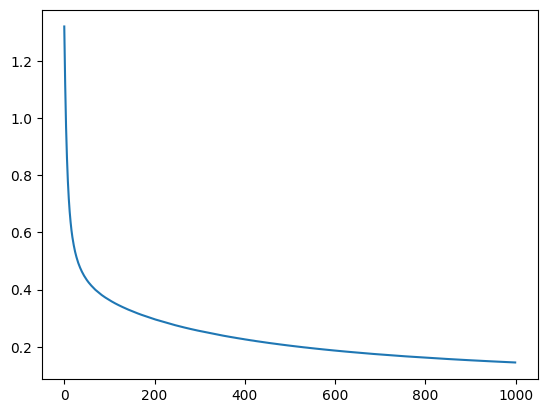

In [49]:
#epochs 를 1000으로 설정
# modeling

# Loss ftn
def loss_ftn(qhat, tt):
    loss = -torch.mean(torch.sum(tt * torch.log(qhat), axis = 1))
    return loss

# linear model 생성
z_model = nn.Linear(4,3,bias = True) #4는 파라미터 개수이며 3은 클래스 개수이다. (다중분류)

# optimizer 정의
optimizer = torch.optim.SGD(z_model.parameters(),lr = 0.01)

n = X_train.shape[0]
epochs = 1000
history = []

for epoch in tqdm(range(epochs)):
    Loss = 0
    for xx, tt in train_loader:
    # zhat
        zhat = z_model(xx)
        qhat = torch.softmax(zhat, dim = 1) # np.exp(zhat[0])/np.sum(np.exp([zhat[0],  zhat[1],  zhat[2]])) 즉 열 방향으로 y에 대한 예측값인 Ey, 확률 산출 -> 하나 꺼내서 확인해보기
        loss = loss_ftn(qhat, tt) #원핫인코딩된 상태 그대로 넣기
        Loss = Loss + loss.item() * len(xx)

        optimizer.zero_grad() #초기화 시키고
        loss.backward() #미분
        optimizer.step() #모델 파라미터 업데이트

    history.append(Loss/n) #Loss는 현재 sum으로 들어가기 때문에(누적손실이므로) n으로 나눠줘야함!
plt.plot(history)


In [50]:
y[0:5]

tensor([0, 0, 0, 0, 0])

In [51]:
qhat

tensor([[9.9879e-01, 1.2083e-03, 1.0306e-08],
        [4.1056e-04, 4.8251e-01, 5.1708e-01],
        [2.2914e-02, 8.8009e-01, 9.6991e-02],
        [1.3576e-02, 9.5715e-01, 2.9274e-02],
        [7.9157e-04, 1.3057e-01, 8.6863e-01],
        [9.3011e-03, 8.8418e-01, 1.0652e-01],
        [5.3315e-03, 8.4991e-01, 1.4476e-01],
        [9.9452e-01, 5.4772e-03, 1.0348e-07]], grad_fn=<SoftmaxBackward0>)

In [52]:
def accuracy_ftn(qhat, t):
  yhat = torch.argmax(qhat, axis = 1).to(torch.float32) #열기준으로 max인 class를 뽑음
  print(yhat)
  y = torch.argmax(t, axis=1).to(torch.float32)
  print(y)
  accuracy = torch.sum((y==yhat).to(torch.float32))
  print(accuracy)
  return accuracy

accuracy_sum = 0

for X, T in test_loader:
    zhat = z_model(X)
    qhat = torch.softmax(zhat, dim = 1)
    print(qhat)
    accuracy_sum = accuracy_sum + accuracy_ftn(qhat, T).item()
    print(accuracy_sum)

print(accuracy_sum/len(X_val))

tensor([[5.5546e-03, 8.7848e-01, 1.1596e-01],
        [9.8256e-01, 1.7442e-02, 5.7010e-07],
        [9.8635e-09, 4.1516e-03, 9.9585e-01],
        [7.4249e-03, 7.1744e-01, 2.7513e-01],
        [7.5089e-04, 7.4393e-01, 2.5532e-01],
        [9.6198e-01, 3.8018e-02, 2.2808e-06],
        [7.2886e-02, 8.7607e-01, 5.1041e-02],
        [2.9578e-05, 4.3010e-02, 9.5696e-01],
        [2.6219e-04, 5.9172e-01, 4.0802e-01],
        [1.8430e-02, 9.2573e-01, 5.5842e-02],
        [5.2123e-04, 1.5609e-01, 8.4339e-01],
        [9.6793e-01, 3.2071e-02, 6.5679e-07],
        [9.7918e-01, 2.0815e-02, 3.6377e-07],
        [9.6982e-01, 3.0176e-02, 6.2789e-07],
        [9.9609e-01, 3.9078e-03, 1.0823e-07],
        [1.1988e-02, 6.4995e-01, 3.3806e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1.])
tensor([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1.])
tensor(16.)
16.0
tensor([[1.5564e-05, 2.7672e-02, 9.7231e-01],
        [1.4780e-02, 9.415

test loader로 정확도를 확인한 결과 1이 나왔다. 과적합이 됐을 가능성도 보임.

## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [3]:
xx, yy = trainset[0]

In [4]:
xx.shape

torch.Size([1, 28, 28])

Ankle boot


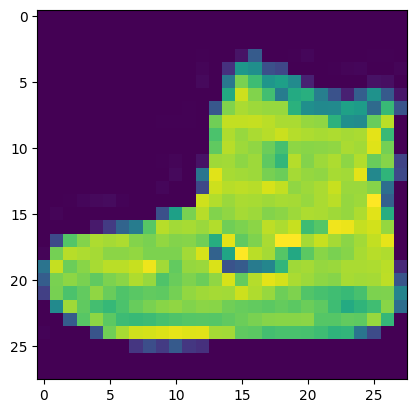

In [7]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"} #그림데이터로 10가지 분류데이터
print(my_name[yy])

the picture

predicted label

real label

Explain the possible reason why your model is wrong in this case.

1. 모델링

2. 모델링을 통해 구한 각 class별 확률을 기준으로 그 예측값이 분류한 class라벨 붙임

3. 실제 라벨과 함께 비교


In [8]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

nn.Linear에 28*28픽셀을 하나의 벡터로 나타내기 위해 28*28개 만들어 하나의 벡터로 표현한다.

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-9-a33738d5c966>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10) #현재 tt를 사용하였다. 이는 원핫인코딩된 상태 . 따라서 여기에서도 원핫인코딩 진행 해야함.
<ipython-input-9-a33738d5c966>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_ = torch.tensor(t_, dtype=torch.float32)
100%|██████████| 20/20 [04:30<00:00, 13.52s/it]


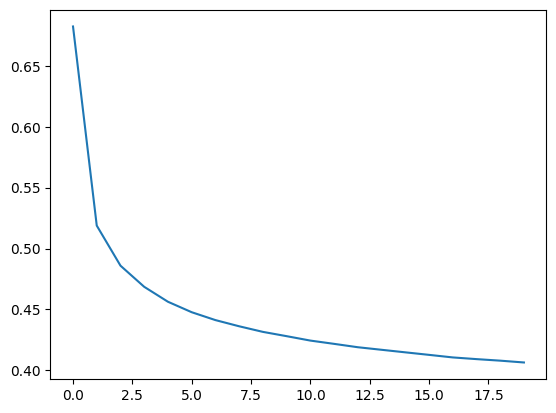

In [9]:
# 모델링 epochs를 20으로 설정한다.

# modeling

# Loss ftn
def loss_ftn(qhat, tt):
    loss = -torch.mean(torch.sum(tt * torch.log(qhat), axis = 1)) #tt는 원핫인코딩 된 형태임
    return loss

# linear model 생성
z_model = nn.Linear(28 * 28 ,10,bias = True) # input: 28*28, output class = 10

# optimizer 정의
optimizer = torch.optim.SGD(z_model.parameters(),lr = 0.01)

n = 60000
epochs = 20
history = []

for epoch in tqdm(range(epochs)):
    Loss = 0
    for xx, tt in train_loader:
    # zhat
        zhat = z_model(xx.reshape([-1,28*28])) # 784 vec의 꼴로 바꿔줌.
        qhat = torch.softmax(zhat, dim = 1) # np.exp(zhat[0])/np.sum(np.exp([zhat[0],  zhat[1],  zhat[2]])) 즉 열 방향으로 y에 대한 예측값인 Ey, 확률 산출 -> 하나 꺼내서 확인해보기
        t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10) #현재 tt를 사용하였다. 이는 원핫인코딩된 상태 . 따라서 여기에서도 원핫인코딩 진행 해야함.
        t_ = torch.tensor(t_, dtype=torch.float32)
        loss = loss_ftn(qhat, t_) # loss = nn.Crossentropy(qhat,y)
        Loss = Loss + loss.item() * len(xx)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    history.append(Loss/n)
plt.plot(history)


```
def accuracy_ftn(qhat, t):
  yhat = torch.argmax(qhat, axis = 1).to(torch.float32)
  y = torch.argmax(t, axis=1).to(torch.float32)
  accuracy = torch.sum((y==yhat).to(torch.float32))
  return accuracy
```

  즉, class별로 나타낸 Y와 확률을 기반으로 class로 분류된 Yhat이 같아지는 것이 accuracy임.   

  달라지는 걸 mis_pred으로 담아 그림으로 확인!

In [11]:
# 모델링으로 각 class별 확률을 기준으로 label 생성
accuracy_sum = 0
for X, Y in test_loader:
    # 모델 확률 예측
    zhat = z_model(X.reshape([-1,28*28]))
    qhat = torch.softmax(zhat, dim = 1)
    # 확률기반 클래스 분류
    Yhat = torch.argmax(qhat, axis = 1).to(torch.float32)

    Y = Y.to(torch.float32)

    # test 데이터의 실제 class값과 비교 및 정확한 값 1로 구해서 sum
    accuracy_sum += torch.sum((Y==Yhat)).to(torch.float32)

accuracy = accuracy_sum/len(validationset)
accuracy

tensor(0.8420)

In [12]:
print(Y!=Yhat,Y[Y!=Yhat]) #miss데이터

tensor([False, False, False, False, False,  True, False, False,  True, False,
        False, False, False,  True, False, False]) tensor([6., 7., 9.])


In [28]:
X.shape

torch.Size([16, 1, 28, 28])

In [29]:
X[Y!=Yhat].shape # Y!=Yhat 3개 있음

torch.Size([0, 1, 28, 28])

In [32]:
print(Y,Yhat) # 실제로 값이 3개가 예측 분류와 실제 값이 다름을 알 수 있음

tensor([2., 9., 7., 5., 7., 1., 2., 2., 4., 8., 0., 8., 7., 3., 7., 6.]) tensor([2., 9., 7., 5., 7., 1., 2., 2., 4., 8., 0., 8., 7., 3., 7., 6.])


```
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])
```


In [36]:
# 모델링으로 각 class별 확률을 기준으로 label 생성
mis_sample = []
mis_label = []
true_label = []

for X, Y in test_loader:
    # 모델 확률 예측
    zhat = z_model(X.reshape([-1, 28*28]))
    qhat = torch.softmax(zhat, dim=1)
    # 확률기반 클래스 분류
    Yhat = torch.argmax(qhat, axis=1).to(torch.float32)

    Y = Y.to(torch.float32)

    # 현재 배치에서 잘못 분류된 데이터를 for문을 사용하여 누적
    for i in range(len(Y)):
        if Y[i] != Yhat[i]:
            mis_sample.append(X[i])
            mis_label.append(Yhat[i])
            true_label.append(Y[i])


In [43]:
len(mis_sample)

1580

tensor(7.)
tensor(5.)


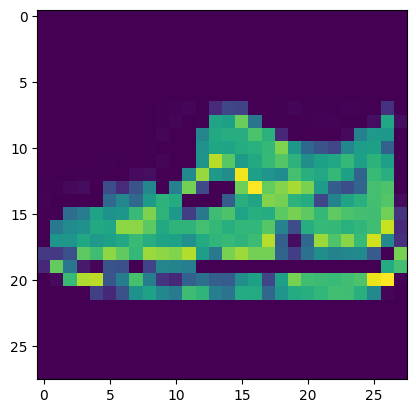

In [39]:
plt.imshow(mis_sample[0].reshape(28,28))
print(mis_label[0]) #잘못예측
print(true_label[0]) #실제 값

tensor(8.)
tensor(0.)


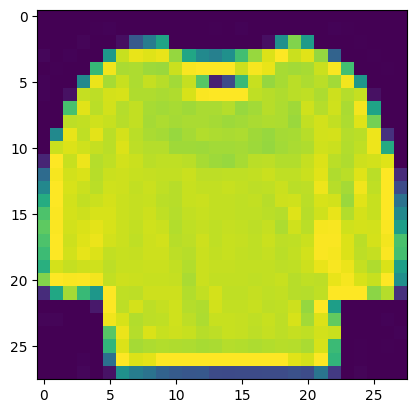

In [40]:
plt.imshow(mis_sample[1].reshape(28,28))
print(mis_label[1])
print(true_label[1])

tensor(2.)
tensor(6.)


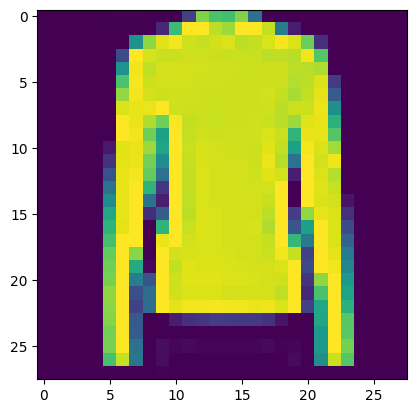

In [41]:
plt.imshow(mis_sample[2].reshape(28,28))
print(mis_label[2])
print(true_label[2])